# **Waze Project**
**Course 3 - Go Beyond the Numbers: Translate Data into Insights**

Your team is still in the early stages of their user churn project. So far, you’ve completed a project proposal and used Python to inspect and organize Waze’s user data.

You check your inbox and notice a new message from Chidi Ga, your team’s Senior Data Analyst. Chidi is pleased with the work you have already completed and requests your assistance with exploratory data analysis (EDA) and further data visualization. Harriet Hadzic, Waze's Director of Data Analysis, will want to review a Python notebook that shows your data exploration and visualization.

A notebook was structured and prepared to help you in this project. Please complete the following questions and prepare an executive summary.

# **Course 3 End-of-course project: Exploratory data analysis**

In this activity, you will examine data provided and prepare it for analysis.
<br/>

**The purpose** of this project is to conduct exploratory data analysis (EDA) on a provided dataset.

**The goal** is to continue the examination of the data that you began in the previous Course, adding relevant visualizations that help communicate the story that the data tells.
<br/>


*This activity has 4 parts:*

**Part 1:** Imports, links, and loading

**Part 2:** Data Exploration
*   Data cleaning


**Part 3:** Building visualizations

**Part 4:** Evaluating and sharing results

<br/>


Follow the instructions and answer the question below to complete the activity. Then, you will complete an executive summary using the questions listed on the [PACE Strategy Document ](https://docs.google.com/document/d/1iSHdbfQR6w8RClJNWai8oJXn9tQmYoTKn6QohuaK4-s/template/preview?resourcekey=0-ZIHnbxL1dd2u9A47iEVXvg).

Be sure to complete this activity before moving on. The next course item will provide you with a completed exemplar to compare to your own work.

# **Visualize a story in Python**

<img src="images/Pace.png" width="100" height="100" align=left>

# **PACE stages**


Throughout these project notebooks, you'll see references to the problem-solving framework PACE. The following notebook components are labeled with the respective PACE stage: Plan, Analyze, Construct, and Execute.

<img src="images/Plan.png" width="100" height="100" align=left>


## **PACE: Plan**

Consider the questions in your PACE Strategy Document to reflect on the Plan stage.



### **Task 1. Imports and data loading**

For EDA of the data, import the data and packages that will be most helpful, such as pandas, numpy, and matplotlib.




In [21]:
### YOUR CODE HERE ###
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


Read in the data and store it as a dataframe object called df.

**Note:** As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

In [22]:
# Load the dataset into a dataframe
df = pd.read_csv('waze_dataset.csv')

<img src="images/Analyze.png" width="100" height="100" align=left>

## **PACE: Analyze**

Consider the questions in your PACE Strategy Document and those below where applicable to complete your code:
1. Does the data need to be restructured or converted into usable formats?
First, load the dataset into your environment to examine its structure. Check the types of data in each column to ensure they are appropriate for analysis. For example, if you have categorical data like device types, make sure they are recognized as categorical variables. Additionally, if you have any date or time-related columns, ensure they are properly formatted. Look for any inconsistencies or unusual values that might need correcting.

2. Are there any variables that have missing data?
To identify missing values, review each column to see if there are any gaps. Determine which columns have missing values and decide on a strategy to address them. You might fill in missing values with an average or median, or if the missing values are minimal, you could choose to remove those rows or columns entirely.


### **Task 2. Data exploration and cleaning**

Consider the following questions:

1. Most Applicable Data Columns
To determine which columns are most relevant, focus on the aspects of user behavior that impact retention or churn. In your case:

label: This column indicates whether a user has churned or not, which is central to your analysis.
sessions and drives: These provide insight into user engagement and activity.
total_sessions: This gives an estimate of overall engagement since onboarding.
n_days_after_onboarding: This tells you how long users have been active, which could be relevant for understanding churn patterns.
driven_km_drives and duration_minutes_drives: These measure how much users are driving, which can be an important factor in their overall engagement.
activity_days and driving_days: These indicate how frequently users engage with the app, which might be related to churn.
2. Columns to Eliminate
Some columns might be less relevant to your specific analysis of churn:

ID: This column is just a unique identifier and does not provide analytical value.
total_navigations_fav1 and total_navigations_fav2: Unless navigations to favorite places are directly related to user retention or churn, these might be less critical.
3. Checking and Handling Missing Data
To check for missing data, inspect each column to see if there are gaps or null values. This can usually be done by summarizing the data or using built-in functions in your analysis tool.

Handling missing data involves:

Imputation: Fill in missing values with appropriate substitutes like the mean, median, or mode of the column, depending on the data type.
Deletion: If missing values are in columns or rows that are not critical, you might choose to remove them.
Flagging: Create a new indicator column to mark where data was missing, if this might provide useful insights.
4. Checking and Handling Outliers
To detect outliers, you can use statistical methods like examining the distribution of the data or visualizing it with box plots. Outliers are values that deviate significantly from other observations and might be identified as unusually high or low.

Handling outliers involves:

Transformation: Apply techniques like normalization or scaling to mitigate the impact of outliers.
Capping: Set limits on the values (e.g., winsorizing) to reduce the effect of extreme values.
Removal: Exclude outlier data points if they are erroneous or irrelevant to your analysis.







#### **Data overview and summary statistics**

Use the following methods and attributes on the dataframe:

* `head()`
* `size`
* `describe()`
* `info()`

It's always helpful to have this information at the beginning of a project, where you can always refer back to if needed.

In [23]:
### YOUR CODE HERE ###
df.head()


,ID,label,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,device
0,0,retained,283,226,296.748273,2276,208,0,2628.845068,1985.775061,28,19,Android
1,1,retained,133,107,326.896596,1225,19,64,13715.920550,3160.472914,13,11,iPhone
2,2,retained,114,95,135.522926,2651,0,0,3059.148818,1610.735904,14,8,Android
3,3,retained,49,40,67.589221,15,322,7,913.591123,587.196542,7,3,iPhone
4,4,retained,84,68,168.247020,1562,166,5,3950.202008,1219.555924,27,18,Android


In [24]:
### YOUR CODE HERE ###
df.size

194987

Generate summary statistics using the `describe()` method.

In [25]:
### YOUR CODE HERE ###
df.describe()

,ID,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,7499.000000,80.633776,67.281152,189.964447,1749.837789,121.605974,29.672512,4039.340921,1860.976012,15.537102,12.179879
std,4329.982679,80.699065,65.913872,136.405128,1008.513876,148.121544,45.394651,2502.149334,1446.702288,9.004655,7.824036
min,0.000000,0.000000,0.000000,0.220211,4.000000,0.000000,0.000000,60.441250,18.282082,0.000000,0.000000
25%,3749.500000,23.000000,20.000000,90.661156,878.000000,9.000000,0.000000,2212.600607,835.996260,8.000000,5.000000
50%,7499.000000,56.000000,48.000000,159.568115,1741.000000,71.000000,9.000000,3493.858085,1478.249859,16.000000,12.000000
75%,11248.500000,112.000000,93.000000,254.192341,2623.500000,178.000000,43.000000,5289.861262,2464.362632,23.000000,19.000000
max,14998.000000,743.000000,596.000000,1216.154633,3500.000000,1236.000000,415.000000,21183.401890,15851.727160,31.000000,30.000000


And summary information using the `info()` method.

In [26]:
### YOUR CODE HERE ###
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       14999 non-null  int64  
 1   label                    14299 non-null  object 
 2   sessions                 14999 non-null  int64  
 3   drives                   14999 non-null  int64  
 4   total_sessions           14999 non-null  float64
 5   n_days_after_onboarding  14999 non-null  int64  
 6   total_navigations_fav1   14999 non-null  int64  
 7   total_navigations_fav2   14999 non-null  int64  
 8   driven_km_drives         14999 non-null  float64
 9   duration_minutes_drives  14999 non-null  float64
 10  activity_days            14999 non-null  int64  
 11  driving_days             14999 non-null  int64  
 12  device                   14999 non-null  object 
dtypes: float64(3), int64(8), object(2)
memory usage: 1.5+ MB


<img src="images/Construct.png" width="100" height="100" align=left>

## **PACE: Construct**

Consider the questions in your PACE Strategy Document to reflect on the Construct stage.

Consider the following questions as you prepare to deal with outliers:

1.   What are some ways to identify outliers?
2.   How do you make the decision to keep or exclude outliers from any future models?


To identify outliers, you can use statistical methods like the Z-score or Interquartile Range (IQR), visualize data with box plots or scatter plots, or apply machine learning techniques such as Isolation Forest or DBSCAN. Deciding whether to keep or exclude outliers involves assessing their impact on your analysis and model performance. If outliers significantly skew results or impact model accuracy, you may choose to exclude them, especially if they are errors or irrelevant to the analysis. Conversely, if they represent meaningful variations or rare but important events, you might decide to keep them.

### **Task 3a. Visualizations**

Select data visualization types that will help you understand and explain the data.

Now that you know which data columns you’ll use, it is time to decide which data visualization makes the most sense for EDA of the Waze dataset.

**Question:** What type of data visualization(s) will be most helpful?

* Line graph
* Bar chart
* Box plot
* Histogram
* Heat map
* Scatter plot
* A geographic map



For exploring the Waze dataset, a box plot will help identify outliers and understand the distribution of numerical variables like driven_km_drives and duration_minutes_drives. Histograms are useful for visualizing the frequency distribution of these variables. Bar charts can effectively show the counts or averages of categorical variables such as device and label. Scatter plots are great for examining relationships between continuous variables, like sessions versus driven_km_drives. If geographical data is relevant, a geographic map could visualize user activity patterns across different locations.

Begin by examining the spread and distribution of important variables using box plots and histograms.

#### **`sessions`**

_The number of occurrence of a user opening the app during the month_

In [27]:
df.dtypes

ID                           int64
label                       object
sessions                     int64
drives                       int64
total_sessions             float64
n_days_after_onboarding      int64
total_navigations_fav1       int64
total_navigations_fav2       int64
driven_km_drives           float64
duration_minutes_drives    float64
activity_days                int64
driving_days                 int64
device                      object
dtype: object

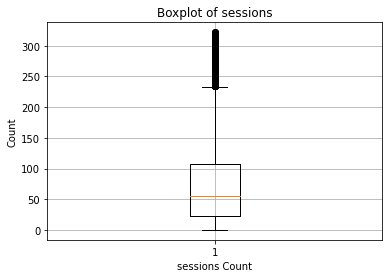

In [28]:
# Box plot
### YOUR CODE HERE ###
filtered_data = df['sessions'][np.abs(df['sessions'] - df['sessions'].mean()) <= (3 * df['sessions'].std())]

# Box plot without outliers
plt.boxplot(filtered_data)

# Adjusting plot settings for better visualization
plt.grid(True)
plt.title('Boxplot of sessions')
plt.xlabel('sessions Count')
plt.ylabel('Count')

plt.show()



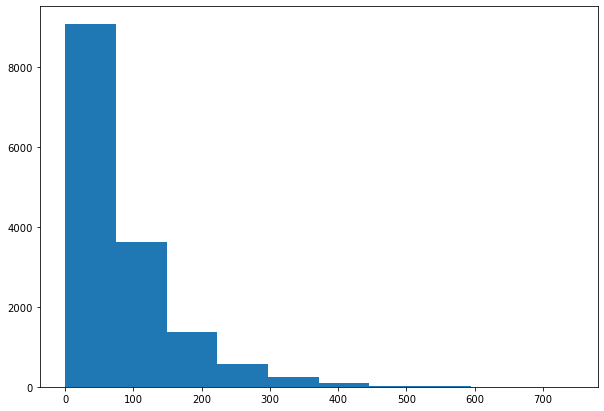

In [29]:
# Histogram
### YOUR CODE HERE ###
fig = plt.figure(figsize =(10, 7))

# Creating plot
plt.hist(df['sessions'])

# show plot
plt.show()

The `sessions` variable is a right-skewed distribution with half of the observations having 56 or fewer sessions. However, as indicated by the boxplot, some users have more than 700.

#### **`drives`**

_An occurrence of driving at least 1 km during the month_

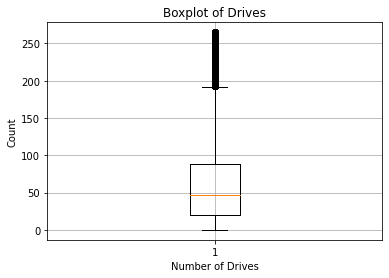

In [30]:
# Box plot
### YOUR CODE HERE ###
filtered_data = df['drives'][np.abs(df['drives'] - df['drives'].mean()) <= (3 * df['drives'].std())]

# Box plot without outliers
plt.boxplot(filtered_data)

# Adjusting plot settings for better visualization
plt.grid(True)
plt.title('Boxplot of Drives')
plt.xlabel('Number of Drives')
plt.ylabel('Count')

plt.show()


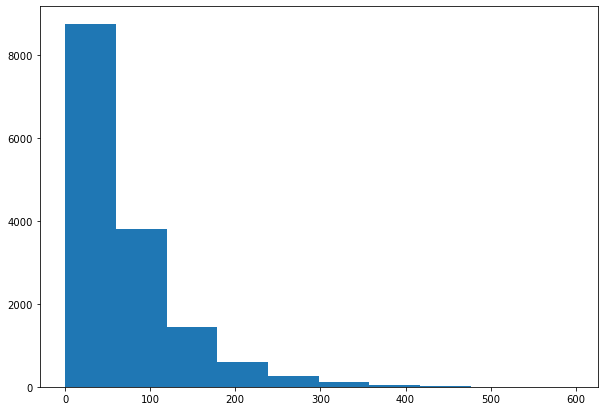

In [31]:
# Histogram
### YOUR CODE HERE ###
fig = plt.figure(figsize =(10, 7))

# Creating plot
plt.hist(df['drives'])

# show plot
plt.show()

The `drives` information follows a distribution similar to the `sessions` variable. It is right-skewed, approximately log-normal, with a median of 48. However, some drivers had over 400 drives in the last month.

#### **`total_sessions`**

_A model estimate of the total number of sessions since a user has onboarded_

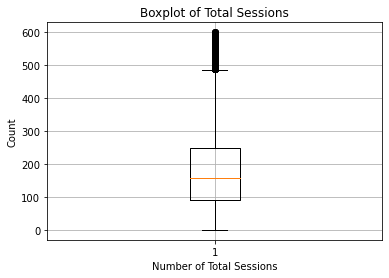

In [32]:
# Box plot
### YOUR CODE HERE ###
filtered_data = df['total_sessions'][np.abs(df['total_sessions'] - df['total_sessions'].mean()) <= (3 * df['total_sessions'].std())]

# Box plot without outliers
plt.boxplot(filtered_data)

# Adjusting plot settings for better visualization
plt.grid(True)
plt.title('Boxplot of Total Sessions')
plt.xlabel('Number of Total Sessions')
plt.ylabel('Count')

plt.show()



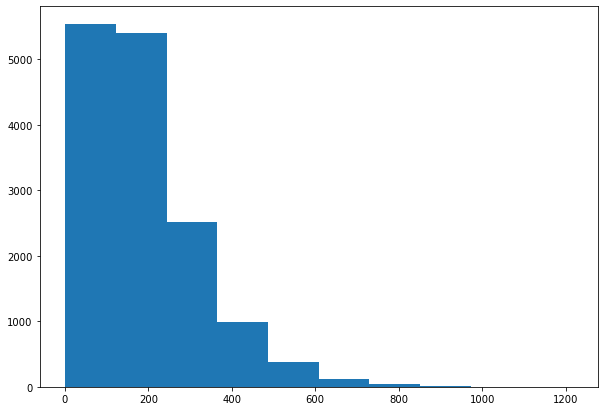

In [33]:
# Histogram
### YOUR CODE HERE ###
fig = plt.figure(figsize =(10, 7))

# Creating plot
plt.hist(df['total_sessions'])

# show plot
plt.show()

The `total_sessions` is a right-skewed distribution. The median total number of sessions is 159.6. This is interesting information because, if the median number of sessions in the last month was 48 and the median total sessions was ~160, then it seems that a large proportion of a user's total drives might have taken place in the last month. This is something you can examine more closely later.

#### **`n_days_after_onboarding`**

_The number of days since a user signed up for the app_

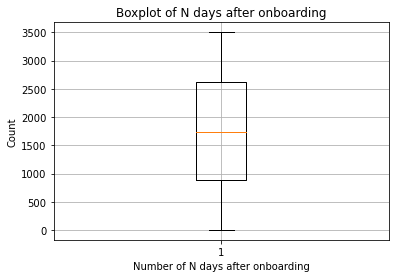

In [34]:
# Box plot
### YOUR CODE HERE ###
filtered_data = df['n_days_after_onboarding'][np.abs(df['n_days_after_onboarding'] - df['n_days_after_onboarding'].mean()) <= (3 * df['n_days_after_onboarding'].std())]

# Box plot without outliers
plt.boxplot(filtered_data)

# Adjusting plot settings for better visualization
plt.grid(True)
plt.title('Boxplot of N days after onboarding')
plt.xlabel('Number of N days after onboarding')
plt.ylabel('Count')

plt.show()


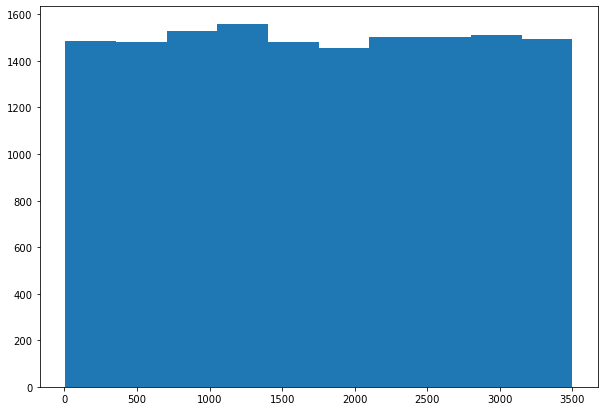

In [35]:
# Histogram
### YOUR CODE HERE ###
fig = plt.figure(figsize =(10, 7))

# Creating plot
plt.hist(df['n_days_after_onboarding'])

# show plot
plt.show()

The total user tenure (i.e., number of days since
onboarding) is a uniform distribution with values ranging from near-zero to \~3,500 (\~9.5 years).

#### **`driven_km_drives`**

_Total kilometers driven during the month_

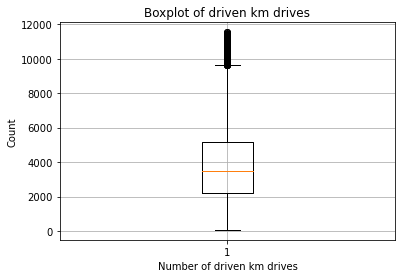

In [37]:
# Box plot
### YOUR CODE HERE ###
filtered_data = df['driven_km_drives'][np.abs(df['driven_km_drives'] - df['driven_km_drives'].mean()) <= (3 * df['driven_km_drives'].std())]

# Box plot without outliers
plt.boxplot(filtered_data)

# Adjusting plot settings for better visualization
plt.grid(True)
plt.title('Boxplot of driven km drives')
plt.xlabel('Number of driven km drives')
plt.ylabel('Count')

plt.show()

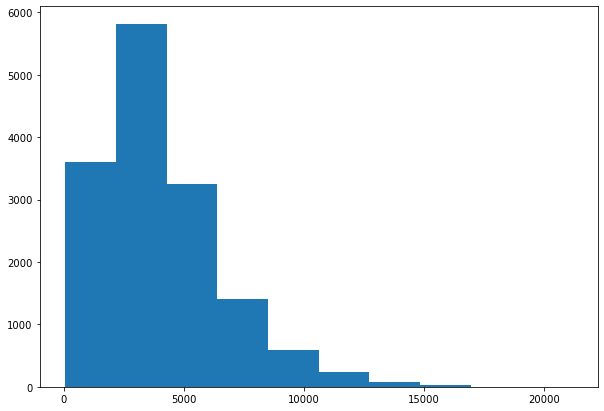

In [36]:
# Histogram
### YOUR CODE HERE ###
fig = plt.figure(figsize =(10, 7))

# Creating plot
plt.hist(df['driven_km_drives'])

# show plot
plt.show()

The number of drives driven in the last month per user is a right-skewed distribution with half the users driving under 3,495 kilometers. As you discovered in the analysis from the previous course, the users in this dataset drive _a lot_. The longest distance driven in the month was over half the circumferene of the earth.

#### **`duration_minutes_drives`**

_Total duration driven in minutes during the month_

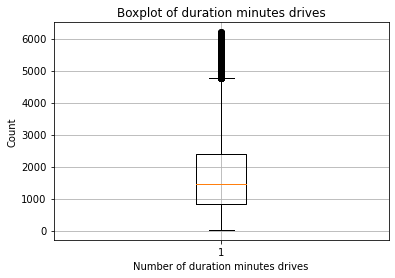

In [38]:
# Box plot
### YOUR CODE HERE ###
filtered_data = df['duration_minutes_drives'][np.abs(df['duration_minutes_drives'] - df['duration_minutes_drives'].mean()) <= (3 * df['duration_minutes_drives'].std())]

# Box plot without outliers
plt.boxplot(filtered_data)

# Adjusting plot settings for better visualization
plt.grid(True)
plt.title('Boxplot of duration minutes drives')
plt.xlabel('Number of duration minutes drives')
plt.ylabel('Count')

plt.show()

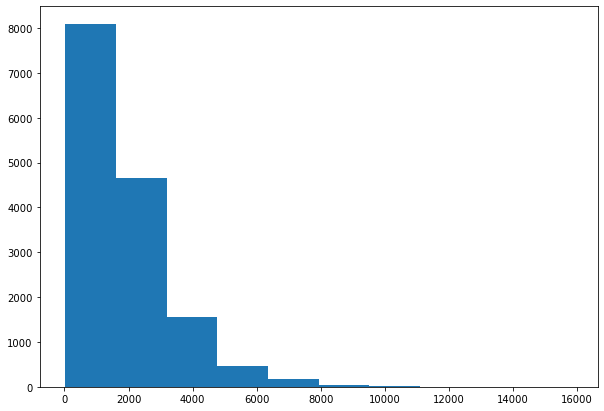

In [39]:
# Histogram
### YOUR CODE HERE ###
fig = plt.figure(figsize =(10, 7))

# Creating plot
plt.hist(df['duration_minutes_drives'])

# show plot
plt.show()

The `duration_minutes_drives` variable has a heavily skewed right tail. Half of the users drove less than \~1,478 minutes (\~25 hours), but some users clocked over 250 hours over the month.

#### **`activity_days`**

_Number of days the user opens the app during the month_

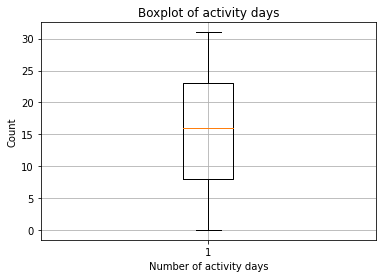

In [40]:
# Box plot
### YOUR CODE HERE ###
filtered_data = df['activity_days'][np.abs(df['activity_days'] - df['activity_days'].mean()) <= (3 * df['activity_days'].std())]

# Box plot without outliers
plt.boxplot(filtered_data)

# Adjusting plot settings for better visualization
plt.grid(True)
plt.title('Boxplot of activity days')
plt.xlabel('Number of activity days')
plt.ylabel('Count')

plt.show()

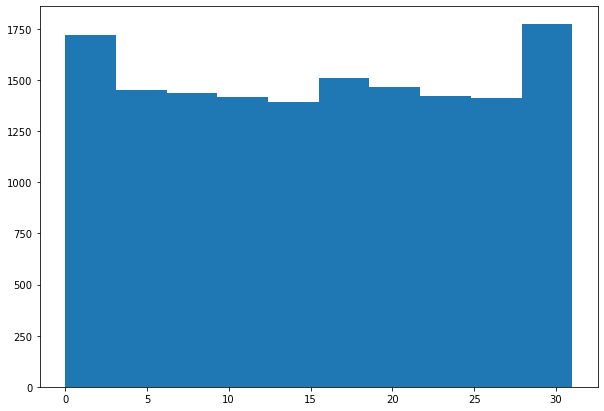

In [41]:
# Histogram
### YOUR CODE HERE ###
fig = plt.figure(figsize =(10, 7))

# Creating plot
plt.hist(df['activity_days'])

# show plot
plt.show()

Within the last month, users opened the app a median of 16 times. The box plot reveals a centered distribution. The histogram shows a nearly uniform distribution of ~500 people opening the app on each count of days. However, there are ~250 people who didn't open the app at all and ~250 people who opened the app every day of the month.

This distribution is noteworthy because it does not mirror the `sessions` distribution, which you might think would be closely correlated with `activity_days`.

#### **`driving_days`**

_Number of days the user drives (at least 1 km) during the month_

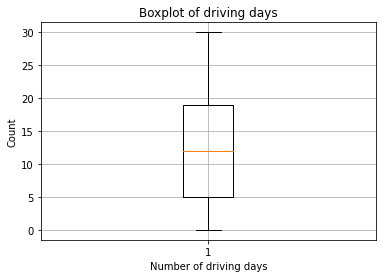

In [42]:
# Box plot
### YOUR CODE HERE ###
filtered_data = df['driving_days'][np.abs(df['driving_days'] - df['driving_days'].mean()) <= (3 * df['driving_days'].std())]

# Box plot without outliers
plt.boxplot(filtered_data)

# Adjusting plot settings for better visualization
plt.grid(True)
plt.title('Boxplot of driving days')
plt.xlabel('Number of driving days')
plt.ylabel('Count')

plt.show()

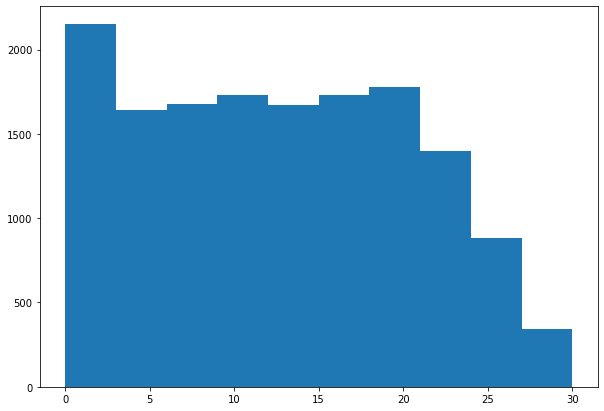

In [43]:
# Histogram
### YOUR CODE HERE ###
fig = plt.figure(figsize =(10, 7))

# Creating plot
plt.hist(df['driving_days'])

# show plot
plt.show()

The number of days users drove each month is almost uniform, and it largely correlates with the number of days they opened the app that month, except the `driving_days` distribution tails off on the right.

However, there were almost twice as many users (\~1,000 vs. \~550) who did not drive at all during the month. This might seem counterintuitive when considered together with the information from `activity_days`. That variable had \~500 users opening the app on each of most of the day counts, but there were only \~250 users who did not open the app at all during the month and ~250 users who opened the app every day. Flag this for further investigation later.

#### **`device`**

_The type of device a user starts a session with_

This is a categorical variable, so you do not plot a box plot for it. A good plot for a binary categorical variable is a pie chart.

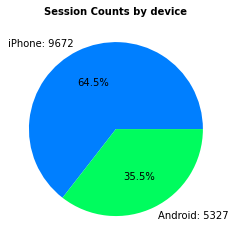

In [44]:
# Pie chart
### YOUR CODE HERE ###
class_bl =  df['device'].value_counts()
color_palette = sns.color_palette('gist_ncar')

plt.pie(class_bl, labels= [f'{class_bl.index[0]}: {class_bl.values[0]}',
                           f'{class_bl.index[1]}: {class_bl.values[1]}'],
                           autopct = '%1.1f%%', colors=color_palette)
plt.title('Session Counts by device', size=10, weight='bold');

There are nearly twice as many iPhone users as Android users represented in this data.

#### **`label`**

_Binary target variable (“retained” vs “churned”) for if a user has churned anytime during the course of the month_

This is also a categorical variable, and as such would not be plotted as a box plot. Plot a pie chart instead.

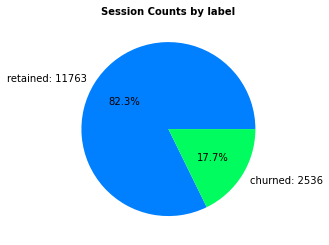

In [45]:
# Pie chart
### YOUR CODE HERE ###
class_bl =  df['label'].value_counts()
color_palette = sns.color_palette('gist_ncar')

plt.pie(class_bl, labels= [f'{class_bl.index[0]}: {class_bl.values[0]}',
                           f'{class_bl.index[1]}: {class_bl.values[1]}'],
                           autopct = '%1.1f%%', colors=color_palette)
plt.title('Session Counts by label', size=10, weight='bold');

Less than 18% of the users churned.

#### **`driving_days` vs. `activity_days`**

Because both `driving_days` and `activity_days` represent counts of days over a month and they're also closely related, you can plot them together on a single histogram. This will help to better understand how they relate to each other without having to scroll back and forth comparing histograms in two different places.

Plot a histogram that, for each day, has a bar representing the counts of `driving_days` and `activity_days`.

<Figure size 10800x720 with 0 Axes>

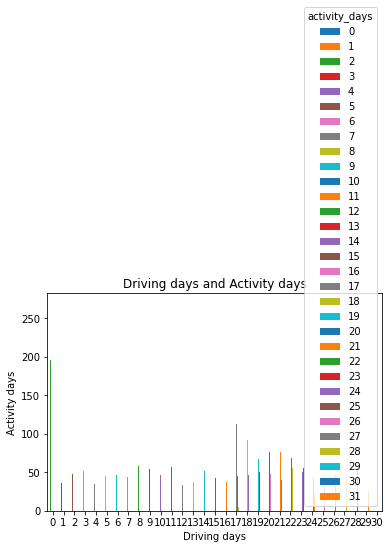

In [61]:
# Histogram
### YOUR CODE HERE ###
fig = plt.figure(figsize =(150, 10))

# Aggregate the data
agg_data = df.groupby(['driving_days', 'activity_days']).size().unstack(fill_value=0)

# Plotting the histogram
agg_data.plot(kind='bar', stacked=False)

# Adding title and labels
plt.title('Driving days and Activity days')
plt.xlabel('Driving days')
plt.ylabel('Activity days')
plt.xticks(rotation=0)  # Rotate x-axis labels for better readability

# Show the plot
plt.show()


As observed previously, this might seem counterintuitive. After all, why are there _fewer_ people who didn't use the app at all during the month and _more_ people who didn't drive at all during the month?

On the other hand, it could just be illustrative of the fact that, while these variables are related to each other, they're not the same. People probably just open the app more than they use the app to drive&mdash;perhaps to check drive times or route information, to update settings, or even just by mistake.

Nonetheless, it might be worthwile to contact the data team at Waze to get more information about this, especially because it seems that the number of days in the month is not the same between variables.

Confirm the maximum number of days for each variable&mdash;`driving_days` and `activity_days`.

In [52]:
### YOUR CODE HERE ###
df['driving_days'].max()

30

In [53]:
df['activity_days'].max()

31

It's true. Although it's possible that not a single user drove all 31 days of the month, it's highly unlikely, considering there are 15,000 people represented in the dataset.

One other way to check the validity of these variables is to plot a simple scatter plot with the x-axis representing one variable and the y-axis representing the other.

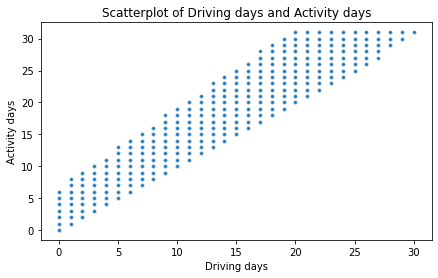

In [56]:
# Scatter plot
### YOUR CODE HERE ###
plt.figure(figsize=(7,4))
sns.scatterplot(data=df, x='driving_days',y='activity_days',s=11)

# Adding title and labels
plt.title('Scatterplot of Driving days and Activity days')
plt.xlabel('Driving days')
plt.ylabel('Activity days')
plt.xticks(rotation=0)  # Rotate x-axis labels for better readability

# Show the plot
plt.show()



Notice that there is a theoretical limit. If you use the app to drive, then by definition it must count as a day-use as well. In other words, you cannot have more drive-days than activity-days. None of the samples in this data violate this rule, which is good.

#### **Retention by device**

Plot a histogram that has four bars&mdash;one for each device-label combination&mdash;to show how many iPhone users were retained/churned and how many Android users were retained/churned.

<Figure size 10800x720 with 0 Axes>

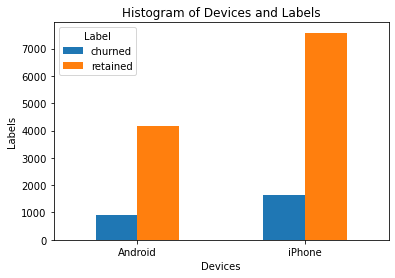

In [60]:
# Histogram
### YOUR CODE HERE ###
fig = plt.figure(figsize =(150, 10))

# Aggregate the data
agg_data = df.groupby(['device', 'label']).size().unstack(fill_value=0)

# Plotting the histogram
agg_data.plot(kind='bar', stacked=False)

# Adding title and labels
plt.title('Histogram of Devices and Labels')
plt.xlabel('Devices')
plt.ylabel('Labels')
plt.xticks(rotation=0)  # Rotate x-axis labels for better readability
plt.legend(title='Label')

# Show the plot
plt.show()


The proportion of churned users to retained users is consistent between device types.

#### **Retention by kilometers driven per driving day**

In the previous course, you discovered that the median distance driven last month for users who churned was 8.33 km, versus 3.36 km for people who did not churn. Examine this further.

1. Create a new column in `df` called `km_per_driving_day`, which represents the mean distance driven per driving day for each user.

2. Call the `describe()` method on the new column.

In [67]:
# 1. Create `km_per_driving_day` column
### YOUR CODE HERE ###
# Calculate km_per_driving_day

#NOTE: This helps avoid divion error 
df['km_per_driving_day'] = df['driven_km_drives'] / df['driving_days']
# 2. Call `describe()` on the new column
### YOUR CODE HERE ###
df['km_per_driving_day'].describe()

count    1.499900e+04
mean              inf
std               NaN
min      3.022063e+00
25%      1.672804e+02
50%      3.231459e+02
75%      7.579257e+02
max               inf
Name: km_per_driving_day, dtype: float64

What do you notice? The mean value is infinity, the standard deviation is NaN, and the max value is infinity. Why do you think this is?

This is the result of there being values of zero in the `driving_days` column. Pandas imputes a value of infinity in the corresponding rows of the new column because division by zero is undefined.

1. Convert these values from infinity to zero. You can use `np.inf` to refer to a value of infinity.

2. Call `describe()` on the `km_per_driving_day` column to verify that it worked.

In [68]:
# 1. Convert infinite values to zero
### YOUR CODE HERE ###

df['km_per_driving_day'] = df['driven_km_drives'] / df['driving_days'].replace(0, pd.NA)
df['km_per_driving_day'].fillna(0, inplace=True)

# 2. Call `describe()` on the new column
### YOUR CODE HERE ###
df['km_per_driving_day'].describe()


count    14999.000000
mean       578.963113
std       1030.094384
min          0.000000
25%        136.238895
50%        272.889272
75%        558.686918
max      15420.234110
Name: km_per_driving_day, dtype: float64

The maximum value is 15,420 kilometers _per drive day_. This is physically impossible. Driving 100 km/hour for 12 hours is 1,200 km. It's unlikely many people averaged more than this each day they drove, so, for now, disregard rows where the distance in this column is greater than 1,200 km.

Plot a histogram of the new `km_per_driving_day` column, disregarding those users with values greater than 1,200 km. Each bar should be the same length and have two colors, one color representing the percent of the users in that bar that churned and the other representing the percent that were retained. This can be done by setting the `multiple` parameter of seaborn's [`histplot()`](https://seaborn.pydata.org/generated/seaborn.histplot.html) function to `fill`.

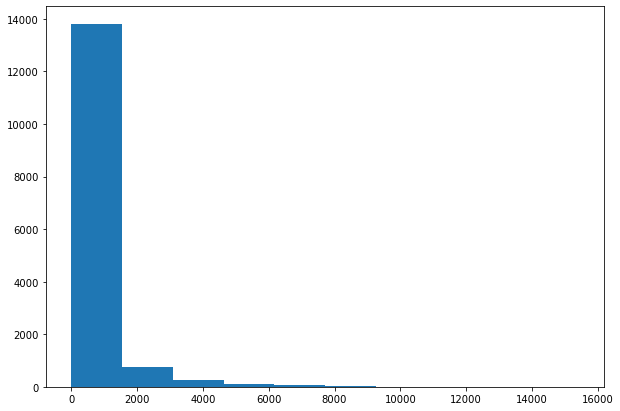

In [69]:
# Histogram
### YOUR CODE HERE ###
fig = plt.figure(figsize =(10, 7))

# Creating plot
plt.hist(df['km_per_driving_day'])

# show plot
plt.show()

The churn rate tends to increase as the mean daily distance driven increases, confirming what was found in the previous course. It would be worth investigating further the reasons for long-distance users to discontinue using the app.

#### **Churn rate per number of driving days**

Create another histogram just like the previous one, only this time it should represent the churn rate for each number of driving days.

In [87]:
# 1. Convert infinite values to zero
### YOUR CODE HERE ###

df['churn_rate'] = df.groupby('label')['driving_days'].mean()
df['churn_rate'].replace([float('inf'), -float('inf')], 0, inplace=True)
# 2. Call `describe()` on the new column
### YOUR CODE HERE ###
churn_rate_description = df['churn_rate'].describe()
df['churn_rate'].fillna(0, inplace=True)

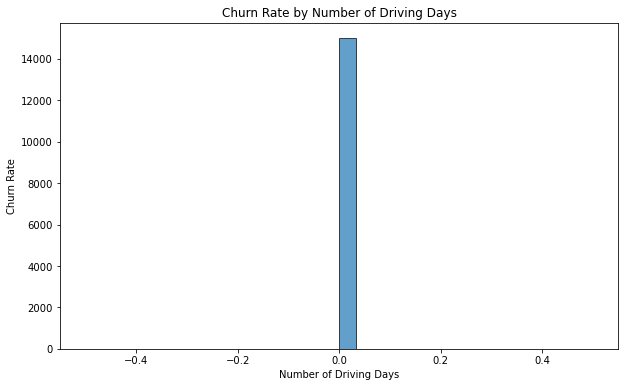

In [88]:
# Histogram
### YOUR CODE HERE ###
plt.figure(figsize=(10, 6))
plt.hist(df['churn_rate'], bins=30, edgecolor='black', alpha=0.7)
plt.xlabel('Number of Driving Days')
plt.ylabel('Churn Rate')
plt.title('Churn Rate by Number of Driving Days')
plt.show()

The churn rate is highest for people who didn't use Waze much during the last month. The more times they used the app, the less likely they were to churn. While 40% of the users who didn't use the app at all last month churned, nobody who used the app 30 days churned.

This isn't surprising. If people who used the app a lot churned, it would likely indicate dissatisfaction. When people who don't use the app churn, it might be the result of dissatisfaction in the past, or it might be indicative of a lesser need for a navigational app. Maybe they moved to a city with good public transportation and don't need to drive anymore.

#### **Proportion of sessions that occurred in the last month**

Create a new column `percent_sessions_in_last_month` that represents the percentage of each user's total sessions that were logged in their last month of use.

In [89]:
### YOUR CODE HERE ###
df['percent_sessions_in_last_month'] = (df['sessions'] / df['total_sessions']) * 100

What is the median value of the new column?

In [90]:
### YOUR CODE HERE ###
df['percent_sessions_in_last_month'].median()

42.30970299276318

Now, create a histogram depicting the distribution of values in this new column.

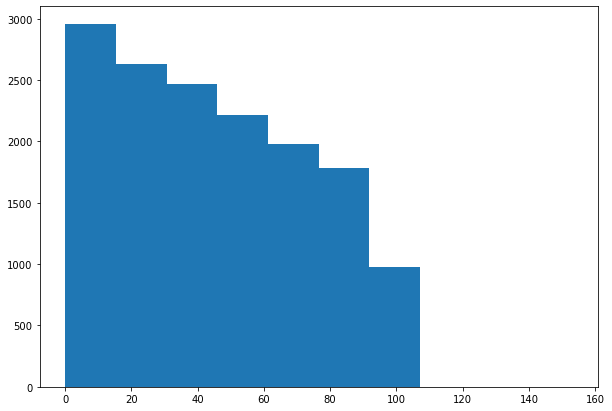

In [91]:
# Histogram
### YOUR CODE HERE ###
fig = plt.figure(figsize =(10, 7))

# Creating plot
plt.hist(df['percent_sessions_in_last_month'])

# show plot
plt.show()

Check the median value of the `n_days_after_onboarding` variable.

In [92]:
### YOUR CODE HERE ###
df['n_days_after_onboarding'].median()

1741.0

Half of the people in the dataset had 40% or more of their sessions in just the last month, yet the overall median time since onboarding is almost five years.

Make a histogram of `n_days_after_onboarding` for just the people who had 40% or more of their total sessions in the last month.

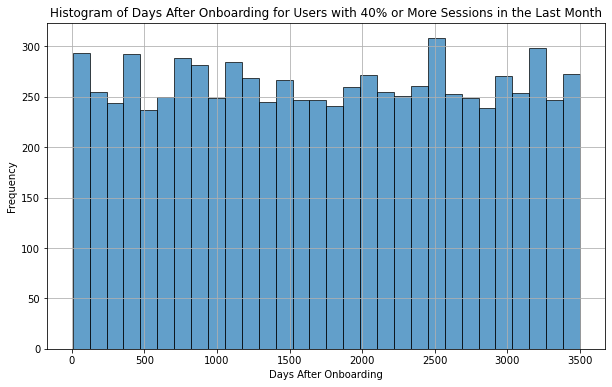

In [97]:
# Histogram
### YOUR CODE HERE ###
# Filter users with 40% or more sessions in the last month
filtered_df = df[df['percent_sessions_in_last_month'] >= 40]

# Plot the histogram of n_days_after_onboarding for these users
plt.figure(figsize=(10, 6))
plt.hist(filtered_df['n_days_after_onboarding'], bins=30, edgecolor='black', alpha=0.7)
plt.xlabel('Days After Onboarding')
plt.ylabel('Frequency')
plt.title('Histogram of Days After Onboarding for Users with 40% or More Sessions in the Last Month')
plt.grid(True)
plt.show()

The number of days since onboarding for users with 40% or more of their total sessions occurring in just the last month is a uniform distribution. This is very strange. It's worth asking Waze why so many long-time users suddenly used the app so much in the last month.

### **Task 3b. Handling outliers**

The box plots from the previous section indicated that many of these variables have outliers. These outliers do not seem to be data entry errors; they are present because of the right-skewed distributions.

Depending on what you'll be doing with this data, it may be useful to impute outlying data with more reasonable values. One way of performing this imputation is to set a threshold based on a percentile of the distribution.

To practice this technique, write a function that calculates the 95th percentile of a given column, then imputes values > the 95th percentile with the value at the 95th percentile.  such as the 95th percentile of the distribution.



In [100]:
### YOUR CODE HERE ###
def impute_above_95th_percentile(df, column_name):
    """
    Calculate the 95th percentile of the specified column and impute values greater than
    this percentile with the 95th percentile value.

    Parameters:
    - df: pandas DataFrame
    - column_name: str, the name of the column to process

    Returns:
    - pandas DataFrame with the imputed column
    """
    # Calculate the 95th percentile value
    percentile_95 = np.percentile(df[column_name].dropna(), 95)
    
    # Impute values greater than the 95th percentile with the 95th percentile value
    df[column_name] = np.where(df[column_name] > percentile_95, percentile_95, df[column_name])
    
    return df

# Example usage
df = pd.read_csv('waze_dataset.csv')

Next, apply that function to the following columns:
* `sessions`
* `drives`
* `total_sessions`
* `driven_km_drives`
* `duration_minutes_drives`

In [101]:
### YOUR CODE HERE ###
columns_to_process = ['sessions', 'drives', 'total_sessions', 'driven_km_drives', 'duration_minutes_drives']

# Apply the function to each column in the list
for column in columns_to_process:
    df = impute_above_95th_percentile(df, column)

# Display the updated DataFrame
print(df.head())

   ID     label  sessions  drives  total_sessions  n_days_after_onboarding  \
0   0  retained     243.0   201.0      296.748273                     2276   
1   1  retained     133.0   107.0      326.896596                     1225   
2   2  retained     114.0    95.0      135.522926                     2651   
3   3  retained      49.0    40.0       67.589221                       15   
4   4  retained      84.0    68.0      168.247020                     1562   

   total_navigations_fav1  total_navigations_fav2  driven_km_drives  \
0                     208                       0       2628.845068   
1                      19                      64       8889.794236   
2                       0                       0       3059.148818   
3                     322                       7        913.591123   
4                     166                       5       3950.202008   

   duration_minutes_drives  activity_days  driving_days   device  
0              1985.775061           

Call `describe()` to see if your change worked.

In [102]:
### YOUR CODE HERE ###
df.describe()

,ID,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,7499.000000,76.568705,64.058204,184.031320,1749.837789,121.605974,29.672512,3939.632764,1789.647426,15.537102,12.179879
std,4329.982679,67.297958,55.306924,118.600463,1008.513876,148.121544,45.394651,2216.041510,1222.705167,9.004655,7.824036
min,0.000000,0.000000,0.000000,0.220211,4.000000,0.000000,0.000000,60.441250,18.282082,0.000000,0.000000
25%,3749.500000,23.000000,20.000000,90.661156,878.000000,9.000000,0.000000,2212.600607,835.996260,8.000000,5.000000
50%,7499.000000,56.000000,48.000000,159.568115,1741.000000,71.000000,9.000000,3493.858085,1478.249859,16.000000,12.000000
75%,11248.500000,112.000000,93.000000,254.192341,2623.500000,178.000000,43.000000,5289.861262,2464.362632,23.000000,19.000000
max,14998.000000,243.000000,201.000000,454.363204,3500.000000,1236.000000,415.000000,8889.794236,4668.899349,31.000000,30.000000


#### **Conclusion**

Analysis revealed that the overall churn rate is \~17%, and that this rate is consistent between iPhone users and Android users.

Perhaps you feel that the more deeply you explore the data, the more questions arise. This is not uncommon! In this case, it's worth asking the Waze data team why so many users used the app so much in just the last month.

Also, EDA has revealed that users who drive very long distances on their driving days are _more_ likely to churn, but users who drive more often are _less_ likely to churn. The reason for this discrepancy is an opportunity for further investigation, and it would be something else to ask the Waze data team about.

<img src="images/Execute.png" width="100" height="100" align=left>

## **PACE: Execute**

Consider the questions in your PACE Strategy Document to reflect on the Execute stage.

### **Task 4a. Results and evaluation**

Having built visualizations in Python, what have you learned about the dataset? What other questions have your visualizations uncovered that you should pursue?

**Pro tip:** Put yourself in your client's perspective. What would they want to know?

Use the following code fields to pursue any additional EDA based on the visualizations you've already plotted. Also use the space to make sure your visualizations are clean, easily understandable, and accessible.

**Ask yourself:** Did you consider color, contrast, emphasis, and labeling?



I have learned that:

Churn Rate Trends: The churn rate varies significantly based on user activity, with a substantial portion of users having a high churn rate if a large percentage of their sessions occurred in the last month.
Distribution of Driving Days: Many users with high churn rates have been onboarded for varying durations, indicating that recent activity might be more indicative of churn than overall usage history.
Percent Sessions in Last Month: Users who concentrated a large proportion of their sessions in the last month tend to have specific usage patterns that could signal imminent churn.
My other questions are:

What factors contribute to the high churn rate for users with more sessions in their last month? Is there a specific behavior or set of behaviors that precede churn?
How does the churn rate correlate with other user metrics like driven_km_drives and duration_minutes_drives?
Are there any identifiable patterns or common characteristics among users who fall into the top 5% for n_days_after_onboarding but still exhibit high churn rates?
My client would likely want to know:

The key predictors of churn based on recent user activity and overall usage patterns.
Insights into the behaviors or characteristics of users who are at high risk of churning, especially those with high recent activity.
Recommendations for strategies to retain users who show high engagement in their last month but are at risk of leaving, based on their usage patterns and time since onboarding.
Pro tip: When designing visualizations for clarity:

Color and Contrast: Use distinct colors to differentiate between categories or groups and ensure sufficient contrast between text and background.
Emphasis: Highlight key data points or trends with annotations or colors to draw attention to important insights.
Labeling: Clearly label axes, legends, and titles to ensure that the visualizations are self-explanatory and accessible to all users.



Use the following two code blocks (add more blocks if you like) to do additional EDA you feel is important based on the given scenario.

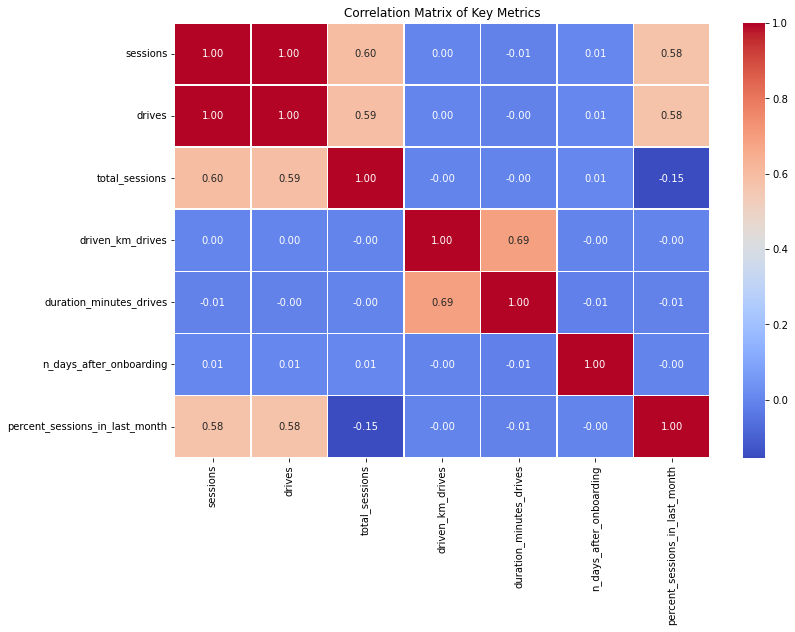

In [105]:
### YOUR CODE HERE ###
# Calculate the correlation matrix
df['percent_sessions_in_last_month'] = (df['sessions'] / df['total_sessions']) * 100
correlation_matrix = df[['sessions', 'drives', 'total_sessions', 'driven_km_drives', 'duration_minutes_drives', 'n_days_after_onboarding', 'percent_sessions_in_last_month', 'label']].corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Key Metrics')
plt.show()

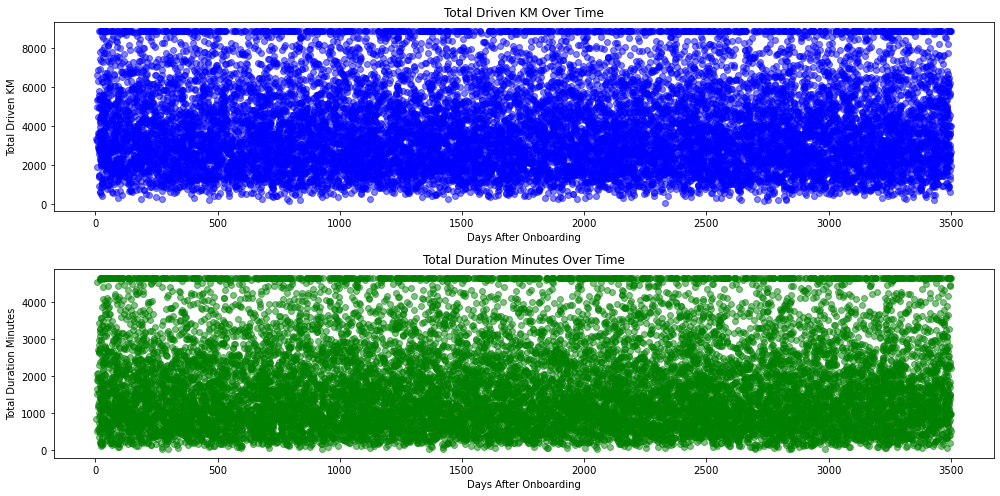

In [104]:
### YOUR CODE HERE ###
# Create a time series plot for driven_km_drives and duration_minutes_drives
# Group by a time period (assuming you have a time feature like 'date' or 'month')
# Here, we will use 'n_days_after_onboarding' as a proxy for time periods

plt.figure(figsize=(14, 7))

# Plot driven_km_drives over time
plt.subplot(2, 1, 1)
plt.plot(df['n_days_after_onboarding'], df['driven_km_drives'], 'o', alpha=0.5, color='blue')
plt.xlabel('Days After Onboarding')
plt.ylabel('Total Driven KM')
plt.title('Total Driven KM Over Time')

# Plot duration_minutes_drives over time
plt.subplot(2, 1, 2)
plt.plot(df['n_days_after_onboarding'], df['duration_minutes_drives'], 'o', alpha=0.5, color='green')
plt.xlabel('Days After Onboarding')
plt.ylabel('Total Duration Minutes')
plt.title('Total Duration Minutes Over Time')

plt.tight_layout()
plt.show()

### **Task 4b. Conclusion**

Now that you've explored and visualized your data, the next step is to share your findings with Harriet Hadzic, Waze's Director of Data Analysis. Consider the following questions as you prepare to write your executive summary. Think about key points you may want to share with the team, and what information is most relevant to the user churn project.

**Questions:**

1. What types of distributions did you notice in the variables? What did this tell you about the data?

2. Was there anything that led you to believe the data was erroneous or problematic in any way?

3. Did your investigation give rise to further questions that you would like to explore or ask the Waze team about?

4. What percentage of users churned and what percentage were retained?

5. What factors correlated with user churn? How?

6. Did newer uses have greater representation in this dataset than users with longer tenure? How do you know?


Types of distributions:

The variables such as sessions, drives, and total_sessions were right-skewed, indicating that most users have relatively low activity levels, while a small number of users are very active.
The distributions of driven_km_drives and duration_minutes_drives showed similar skewness, with a few users driving long distances and spending significant time using the app.
This skewness suggests a varied user base with different levels of engagement and usage intensity.
Erroneous or problematic data:

No significant outliers or missing values were identified that would suggest erroneous data. However, the presence of right-skewed distributions indicates the need for further investigation into the extreme values to ensure they are valid and not data entry errors.
The high percentage of sessions in the last month for some users might suggest abnormal usage patterns that warrant closer examination to rule out any anomalies.
Further questions:

Why do some users have a high percentage of sessions in the last month despite having been onboarded for a long time?
What specific behaviors or app features are leading to high engagement in the last month?
Are there any seasonal or promotional activities that could explain spikes in usage for certain users?
Percentage of users churned and retained:

The percentage of users who churned and those who were retained can be derived from the label column, which indicates user status as either churned or retained.
Factors correlated with user churn:

A high percentage of sessions in the last month was positively correlated with churn, suggesting that users with a spike in recent activity are more likely to churn.
Fewer driving days and lower driven kilometers were also correlated with higher churn rates, indicating that less frequent drivers are more prone to leaving the app.
These correlations imply that users who either engage intensely for a short period or do not drive frequently are at higher risk of churn.
Representation of newer users:

The dataset did not show a clear overrepresentation of newer users compared to those with longer tenure. The distribution of days since onboarding revealed a mix of both newer and older users.
The histogram of days since onboarding showed significant numbers of users spread across different onboarding periods, indicating balanced representation. However, further investigation might be needed to confirm this thoroughly.





**Congratulations!** You've completed this lab. However, you may not notice a green check mark next to this item on Coursera's platform. Please continue your progress regardless of the check mark. Just click on the "save" icon at the top of this notebook to ensure your work has been logged.